In [16]:
import geopandas as gpd
import pandas as pd

In [17]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("../data/World_Countries_(Generalized)/World_Countries__Generalized_.shp")
print(regions.crs)

EPSG:4326


In [18]:
# Create a DataFrame with health facilities in Ghana
satellite_df = pd.read_csv("../data/last_30_days_launches.csv")

# Convert the DataFrame to a GeoDataFrame
satellite_pos = gpd.GeoDataFrame(satellite_df, geometry=gpd.points_from_xy(satellite_df.Longitude, satellite_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
satellite_pos.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
satellite_pos.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Satellite,Latitude,Longitude,geometry
0,STARLINK-6035,-0.778664,-15.191491,POINT (-15.19149 -0.77866)
1,STARLINK-6035,-13.398631,162.808264,POINT (162.80826 -13.39863)
2,STARLINK-6035,27.000258,-19.343903,POINT (-19.34390 27.00026)
3,STARLINK-6035,-40.988972,157.819852,POINT (157.81985 -40.98897)
4,STARLINK-6035,54.416671,-26.348868,POINT (-26.34887 54.41667)


<AxesSubplot: >

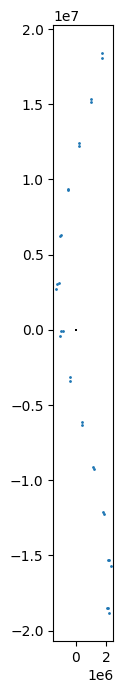

In [19]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
satellite_pos.to_crs(epsg=32630).plot(markersize=1, ax=ax)